In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation
from tensorflow.keras.utils import to_categorical



In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(512, activation='relu')(inputs)  # 1
    x = Dense(512, activation='relu')(x)       # 2
    x = Dense(256, activation='relu')(x)       # 3
    x = Dense(256, activation='relu')(x)       # 4
    x = Dense(128, activation='relu')(x)       # 5
    x = Dense(128, activation='relu')(x)       # 6
    x = Dense(64, activation='relu')(x)        # 7
    x = Dense(64, activation='relu')(x)        # 8
    x = Dense(32, activation='relu')(x)        # 9
    x = Dense(32, activation='relu')(x)        # 10
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


In [6]:
def residual_block(x, units):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = Dense(units)(x)

    # Match dimensions for addition
    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Dense(units)(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def create_resnet_dnn():
    inputs = Input(shape=(784,))
    x = Dense(512, activation='relu')(inputs)

    # 5 residual blocks × 2 layers each = 10 hidden layers
    for _ in range(5):
        x = residual_block(x, 512)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

In [7]:
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


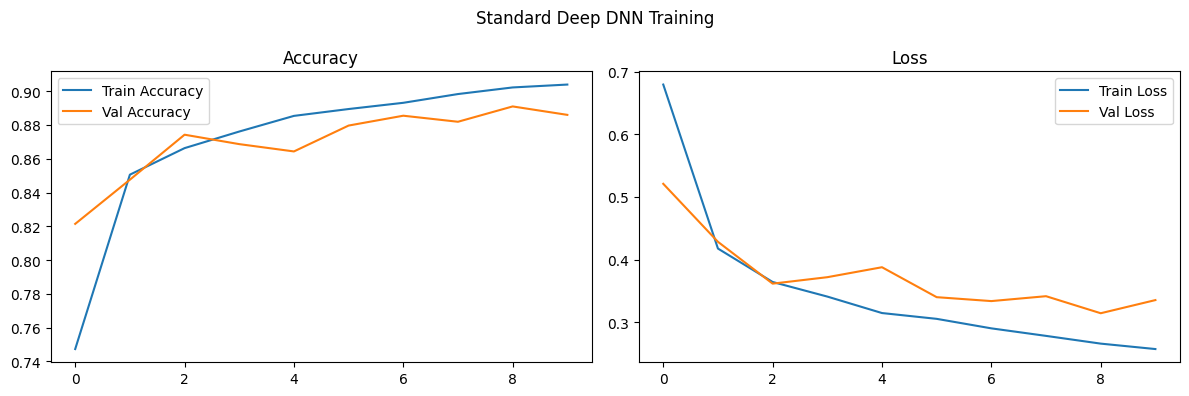

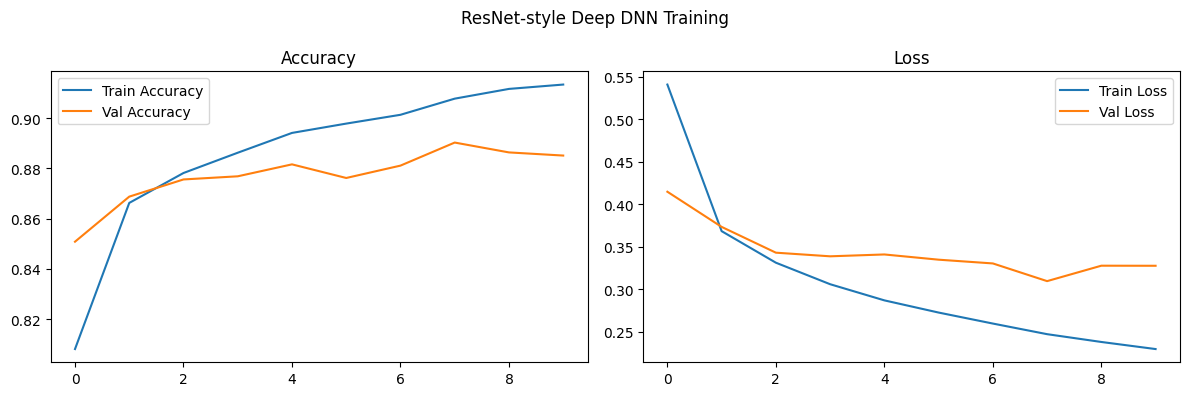

In [8]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(dnn_history, 'Standard Deep DNN Training')
plot_history(resnet_history, 'ResNet-style Deep DNN Training')


In [9]:
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

print(f"Standard Deep DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style Deep DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard Deep DNN Test Accuracy: 0.0999
ResNet-style Deep DNN Test Accuracy: 0.0899



Standard Deep DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


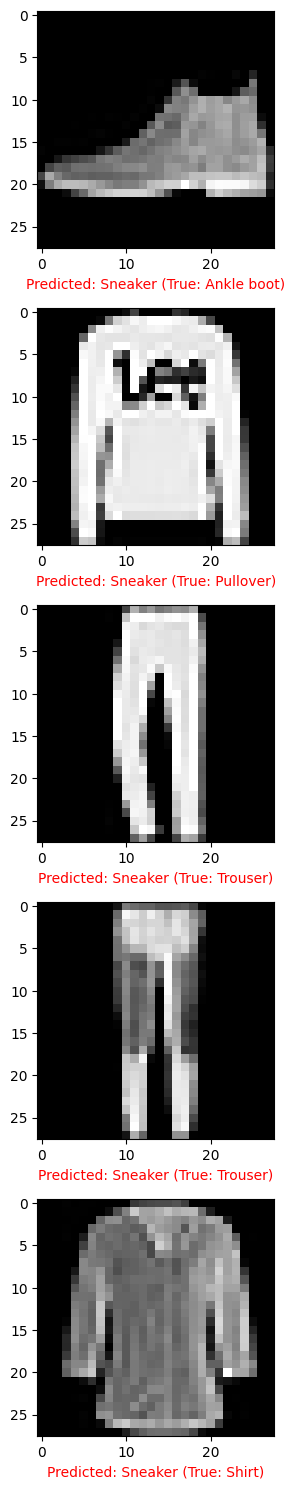


ResNet-style Deep DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


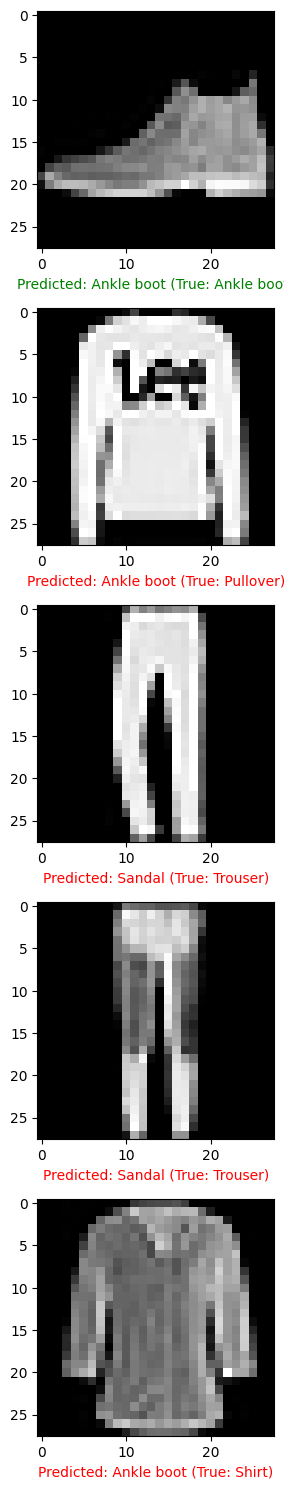

In [11]:
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.tight_layout()
    plt.show()

print("\nStandard Deep DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style Deep DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)